In [ ]:
#Objective:
# a)Find the top skills used for data science jobs
# b)Find the top tools used for data science jobs
# c)Using NLP find the most used words in the job descriptions 
# e)Based on the keywords in jobdescription,summary,location,state,city predict the salary range above median or low  

In [535]:
KeywordCities = ['Austin','Florida','New+Jersey','virgina','maryland','Colorado','New+York', 'Chicago', 'San+Francisco', 'Seattle', 
    'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh','Portland', 'Phoenix', 'Denver','Houston', 'Miami', 'washington+dc', 'boston', 'new+orleans', 'charlotte']

In [536]:
# Check for robots.txt file from webscraping <indeed.com> & <linkedin.com>
import urllib.robotparser
RoboCheck = urllib.robotparser.RobotFileParser()

# Indeed 
RoboCheck.set_url('https://www.indeed.com/robots.txt')
RoboCheck.read()
RoboCheck.can_fetch('*','https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=10')

# we tried to scrape linkedin.com but looks like the bot is killing the sessions and thats ending up kill
#the kernel so we dealt with indeed.com attached the code as proof of concept

True

In [3]:
from bs4 import BeautifulSoup as bsoup
import requests
import csv
import pandas as pd
from time import sleep 
from random import randint

job_dict ={}
# Indeed_url = 'https://www.indeed.com/jobs?q=data+scientist&l={}&start={}'
#Linkedin_url = f'https://www.linkedin.com/jobs/search/?geoId=103644278&keywords=data%2Bscientist&location={}&start={}'

df = pd.DataFrame(columns=['JobTitle','Location','CompanyName','summary','salary','Description'])
for city in KeywordCities:
    for i in range(0,200,10):    
        Indeed_url = f'https://www.indeed.com/jobs?q=data+scientist&l={city}&start={i}'
        print(f'Calling : {Indeed_url}')
        response = requests.get(Indeed_url)
        print(response.status_code)
        # sleep for in between requests 
        sleep(randint(6,20))
        IndeedData= bsoup(response.text, 'html.parser')
        jobData = IndeedData.find_all(class_ ='result')
        for Data in jobData:
            try: 
                href=Data.find(class_='jobtitle')['href']
                title = Data.find(class_='jobtitle').text.replace('\n', '')
                Joblink = f'https://www.indeed.com{href}'
                #print(Joblink)
                #sleep(randint(6,10))
                keywordResponse=requests.get(str(Joblink))
                #print(keywordResponse.status_code)
                keywordData=bsoup(keywordResponse.text, 'html.parser')
                try:
                    Final_detailed_desc=keywordData.find('div',{'class':'jobsearch-jobDescriptionText'}).text
                except:
                    Final_detailed_desc = ''
                    #print(Final_detaild_desc)
            except:
                title = ''
            try:
                location = Data.find('span', {'class':"location" }).text.replace('\n', '')
                #print(location)
            except:
                location = ''
            try: 
                company = Data.find(class_='company').text.replace('\n', '')
            except:
                company = ''
            try:
                summary = Data.find(class_='summary').text.replace('\n', '')
            except:
                summary = ''
            try:
                salary = Data.find('span', {'class':"salaryText" }).text.replace('\n', '')
            except:
                salary = ''
            
            job_dict['JobTitle'] = title
            job_dict['CompanyName'] = company
            job_dict['summary'] = summary
            job_dict['Location'] = location
            job_dict['salary'] = salary
            job_dict['Description'] = Final_detailed_desc
            
            #Append the dict list 
            df = df.append(job_dict, ignore_index=True)
            # print(job_dict)
df.drop_duplicates(inplace=True)
df


Calling : https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=0
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=10
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=20
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=30
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=40
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=50
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=60
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=70
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=80
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=90
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=100
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=110
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Austin&start=120
2

200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Colorado&start=40
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Colorado&start=50
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Colorado&start=60
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Colorado&start=70
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Colorado&start=80
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Colorado&start=90
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Colorado&start=100
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Colorado&start=110
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Colorado&start=120
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Colorado&start=130
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Colorado&start=140
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Colorado&start=150
200
Calling : https://www.indeed.com/jobs?q=da

200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Seattle&start=70
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Seattle&start=80
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Seattle&start=90
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Seattle&start=100
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Seattle&start=110
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Seattle&start=120
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Seattle&start=130
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Seattle&start=140
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Seattle&start=150
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Seattle&start=160
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Seattle&start=170
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Seattle&start=180
200
Calling : https://www.indeed.com/jobs?q=data+scient

200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Pittsburgh&start=100
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Pittsburgh&start=110
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Pittsburgh&start=120
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Pittsburgh&start=130
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Pittsburgh&start=140
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Pittsburgh&start=150
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Pittsburgh&start=160
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Pittsburgh&start=170
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Pittsburgh&start=180
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Pittsburgh&start=190
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Portland&start=0
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Portland&start=10
200
Calling : https://w

200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Miami&start=150
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Miami&start=160
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Miami&start=170
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Miami&start=180
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=Miami&start=190
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=washington+dc&start=0
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=washington+dc&start=10
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=washington+dc&start=20
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=washington+dc&start=30
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=washington+dc&start=40
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=washington+dc&start=50
200
Calling : https://www.indeed.com/jobs?q=data+scientist&l=washington+dc&start=60
200
Calling : https://www.in

,JobTitle,Location,CompanyName,summary,salary,Description
0,"Data Scientist (Austin, TX)",,KNIME AG,Experience with the different phases of the co...,,"At KNIME, we are merging science with state-of..."
1,Data Scientist,,HCL Technologies,The ideal candidate will be capable of applyin...,"$50,000 - $120,169 a year",*Candidates must be authorized to work in the ...
2,Data Scientist,,PrimeNeuro,1-3 years of experience in applied machine lea...,"$95,000 - $105,000 a year",Clinical Data Scientist Job SummaryDo you know...
3,Data Scientist,"Austin, TX 73301 (St Edwards area)",IBM,Actual incentive opportunity will be based on ...,,"Introduction\nAs a Data Scientist at IBM, you ..."
4,Data Scientist,"Austin, TX 78705 (West University area)",Valkyrie Intelligence,We are looking for candidates who are interest...,"$85,000 - $115,000 a year","Location: Based in Austin, TXTravel: 0-20%Abou..."
...,...,...,...,...,...,...
3166,DATA SCIENTIST,"Houston, TX",Sensia Global,Maintain mastery of state-of-the-art relevant ...,,
3167,Data Scientist- Pathology,"Houston, TX",Houston Methodist,The data scientist will review clinical and re...,,
3168,Data Scientist,"Houston, TX 77032",INVISTA,1+ year of experience using machine learning f...,,
3169,Data Scientist (611659),"Houston, TX 77084",Aramco Services Company,Demonstrated experience in developing core mac...,,


In [537]:
# Metadata information about the dataframe
def Metadatainfo(dataframe): 
    print(f"Duplicates in a data fame : {dataframe.duplicated().sum()}")
    print(f"Null values: {dataframe.isnull().sum()}")
    print(f"Describe: {dataframe.describe()}")
    print(f"Types: {dataframe.dtypes}")
    print(f"Shape :{dataframe.shape}")
    for item in dataframe:
        print(dataframe[item].nunique())


In [5]:
# Gave an empty string so the value is zero for most of them ,will need to fix this 
#for actual results by replacing np.nan
df.isnull().sum()

JobTitle       0
Location       0
CompanyName    0
summary        0
salary         0
Description    0
dtype: int64

In [6]:
# Copy of dataframe 
Indeed_df = df.copy()

# save data frame using pickle
df.to_pickle("25States_indeed_jobs.pkl")

# CSV file copy 
df.to_csv('25States_indeed_jobs.csv')


JobTitle       0
Location       0
CompanyName    0
summary        0
salary         0
Description    0
dtype: int64

In [560]:
# read the exported csv file back for ease approach 
import pandas as pd 
IndeedJobsData = pd.read_csv('25States_indeed_jobs.csv')

In [561]:
# Information about data 
Metadatainfo(IndeedJobsData)

Duplicates in a data fame : 0
Null values: Unnamed: 0        0
JobTitle          0
Location        136
CompanyName       1
summary           0
salary         2121
Description     415
dtype: int64
Describe:         Unnamed: 0
count  2345.000000
mean   1466.838380
std     870.478308
min       0.000000
25%     692.000000
50%    1445.000000
75%    2240.000000
max    3170.000000
Types: Unnamed: 0      int64
JobTitle       object
Location       object
CompanyName    object
summary        object
salary         object
Description    object
dtype: object
Shape :(2345, 7)
2345
1347
663
1089
1851
166
1757


In [563]:
# Replace '' empty string with np.nan
import numpy as np 
IndeedJobsData.replace(r'^\s*$', np.nan, regex=True)
IndeedJobsData.drop(['Unnamed: 0'], axis=1, inplace=True)
IndeedJobsData.isnull().sum()


JobTitle          0
Location        136
CompanyName       1
summary           0
salary         2121
Description     415
dtype: int64

In [571]:
# Drop the location places and no other fields have that value and its a small subset 
IndeedJobsData.dropna(subset = ['Location'],inplace=True)
IndeedJobsData.reset_index(inplace=True)
IndeedJobsData.drop(['index'], axis=1, inplace=True)
IndeedJobsData.isnull().sum()

JobTitle          0
Location          0
CompanyName       1
summary           0
salary         2030
Description     371
dtype: int64

In [572]:
# Fix the salary format of data :removing  special characters ,space
IndeedJobsData.salary.replace(regex=True, inplace=True, to_replace="\n", value="")
IndeedJobsData.salary.replace(regex=True, inplace=True, to_replace=",", value="")
IndeedJobsData.salary.replace(regex=True, inplace=True, to_replace="\$", value="")

In [576]:
# sample output of salary not null value (179 rows out of 2k )
IndeedJobsData[IndeedJobsData['salary'].notnull()].sample(50)

,JobTitle,Location,CompanyName,summary,salary,Description
2154,Data Scientist - Nationwide Opportunities,"Denver, CO","Amazon Web Services, Inc.",Experience in an ML engineer or data scientist...,114700 a year,\nBachelor’s degree in a highly quantitative f...
2165,Sr. Business Analyst/Data Scientist,"Denver, CO 80237 (Hampden South area)",PHOENIX,"Design, develop and deploy advanced analytics ...",50000 - 90000 a year,The Sr. Business Analyst / Data Scientist will...
517,Vice President of Product (Artificial Intellig...,"McLean, VA","BigBear, Inc.",BigBear.ai provides a comprehensive suite of s...,175000 - 240000 a year,VICE PRESIDENT OF PRODUCTBigBear.ai is seeking...
779,Analytic Data Scientist (TS/SCI),"Denver, CO",IBM,Duties include: • Developing and maintaining a...,107000 - 194000 a year,"Introduction\nAs a Data Scientist at IBM, you ..."
776,Senior Data Scientist,Colorado,Snapdocs,"As a Senior Data Scientist, you will focus on ...",140000 - 175000 a year,"At Snapdocs, we are on a mission to enhance th..."
2175,Data Scientist Lead,"Denver, CO",SonderMind,You will foster cross-functional and cross-tea...,110000 a year,SonderMind is hiring a Data Scientist Lead to ...
802,Senior Data Science and Projection Modeling Lead,Colorado,BDS Analytics,Interface with data end-users and the data sto...,120000 - 140000 a year,Job Summary: The Analytics team empowers BDSA ...
2157,Data Statistician,"Denver, CO 80202 (Central Business District area)",Jackson Lewis P.C,Ability to multi-task and manage multiple proj...,66000 - 111000 a year,Focused on labor and employment law since 1958...
782,Senior Data Science Manager - Job Seeker Profile,"Denver, CO",Indeed,Our Data Scientists build and implement machin...,187000 - 231000 a year,NaN
2155,Data Scientist,"Denver, CO 80237 (Hampden South area)",ModivCare,Good data visualization and communication skil...,86561 - 115415 a year,POSITION SUMMARYThe HR Data Scientist will ass...


In [577]:
# Split the Location column to creating a new attributes : city and state 
IndeedJobsData['Location_split'] = IndeedJobsData['Location'].str.split(',') 
IndeedJobsData['city'] = IndeedJobsData['Location_split'].str[0] 
IndeedJobsData['state'] = IndeedJobsData['Location_split'].str[1] 
IndeedJobsData['state'] = IndeedJobsData['state'].str[0:3] 
#IndeedJobsData.drop(['Location_split'], axis=1, inplace=True) 
IndeedJobsData.isnull().sum()
    

JobTitle             0
Location             0
CompanyName          1
summary              0
salary            2030
Description        371
Location_split       0
city                 0
state               31
dtype: int64

In [578]:
IndeedJobsData.head(50)

,JobTitle,Location,CompanyName,summary,salary,Description,Location_split,city,state
0,Data Scientist,"Austin, TX 73301 (St Edwards area)",IBM,Actual incentive opportunity will be based on ...,NaN,"Introduction\nAs a Data Scientist at IBM, you ...","[Austin, TX 73301 (St Edwards area)]",Austin,TX
1,Data Scientist,"Austin, TX 78705 (West University area)",Valkyrie Intelligence,We are looking for candidates who are interest...,85000 - 115000 a year,"Location: Based in Austin, TXTravel: 0-20%Abou...","[Austin, TX 78705 (West University area)]",Austin,TX
2,Data Scientist,"Austin, TX 78701 (Downtown area)",Kronologic,"An ability to use, and extend approaches descr...",90000 - 200000 a year,Come help us revolutionize the calendar!Core V...,"[Austin, TX 78701 (Downtown area)]",Austin,TX
3,Digital Product Data Scientist,"Austin, TX 78703 (Downtown area)","Under Armour, Inc.",A Digital Product Data Scientist works closely...,NaN,Under Armour has one mission: to make you bett...,"[Austin, TX 78703 (Downtown area)]",Austin,TX
4,Junior Data Scientist,"Austin, TX",ANALYTOS,Designs and drives the creation of new standar...,NaN,You will collaborate with the brightest techni...,"[Austin, TX]",Austin,TX
5,Data Scientist,"Austin, TX 78730",Hard Rock Digital,"As a data scientist, you will be a technical l...",NaN,What are we building?\nHard Rock Digital is a ...,"[Austin, TX 78730]",Austin,TX
6,Data Scientist,"Austin, TX",YETI Coolers,"Gather business requirements, translate them i...",NaN,"At YETI, we believe that time spent outdoors m...","[Austin, TX]",Austin,TX
7,"Data Scientist, Ad Platforms","Austin, TX",Apple,A successful candidate will have deep experien...,NaN,"Summary\nPosted: May 26, 2021\nWeekly Hours: 4...","[Austin, TX]",Austin,TX
8,Data Scientist,"Austin, TX 78701 (Downtown area)","Applied Systems, Inc.","Work with leaders from Data Science, Product, ...",NaN,"Job Overview:\n\nApplied Systems, Inc., a worl...","[Austin, TX 78701 (Downtown area)]",Austin,TX
9,Data Scientist,"Austin, TX",Babylon Health,Your primary focus will be in translating busi...,NaN,"We are a team on a mission, to put accessible ...","[Austin, TX]",Austin,TX


In [579]:
# cleanup the state null value with state names 
state_null_values = IndeedJobsData.index[IndeedJobsData['state'].isnull()].tolist()
state_mappinmg= {'Florida' : 'FL', 'New Jersey' : 'NJ' , 'Virginia' : 'VA' ,'Maryland' : 'MD','Colorado': 'CO'} 
for i in state_null_values:
    if np.isnan(IndeedJobsData.iloc[i,8]):
        IndeedJobsData.at[i,'state'] = state_mappinmg[IndeedJobsData.iloc[i,7]]


In [580]:
# Removing the location_split and Location(city,state available) and verifying the state col null values 
IndeedJobsData.isnull().sum()
IndeedJobsData.drop(['Location_split','Location'], axis=1, inplace=True) 
IndeedJobsData.isnull().sum()

JobTitle          0
CompanyName       1
summary           0
salary         2030
Description     371
city              0
state             0
dtype: int64

In [581]:
# fixing the NAN value of companyname based on the description 
IndeedJobsData[IndeedJobsData['CompanyName'].isnull()]
#IndeedJobsData['Description'].iloc[1490,]
IndeedJobsData.at[1490,'CompanyName'] = 'PMI'
IndeedJobsData.isnull().sum()

JobTitle          0
CompanyName       0
summary           0
salary         2030
Description     371
city              0
state             0
dtype: int64

In [583]:
# Cleanup Descripton with NAN values to 'Not available' and remove special characters from it 
IndeedJobsData.Description.replace(regex=True, inplace=True, to_replace="\n", value="")

# np.nan to 'Not available' as we are looking for the major keywords in the description and to avoid exceptions 
Desc_null_values = IndeedJobsData.index[IndeedJobsData['Description'].isnull()].tolist()
for i in Desc_null_values:
    if np.isnan(IndeedJobsData.iloc[i,4]):
        IndeedJobsData.at[i,'Description'] = 'Not Available'
IndeedJobsData.isnull().sum()

JobTitle          0
CompanyName       0
summary           0
salary         2030
Description       0
city              0
state             0
dtype: int64

In [593]:
# converting to lower case which would ease for NLP 
IndeedJobsData['JobTitle']= IndeedJobsData['JobTitle'].str.lower()
IndeedJobsData['summary']= IndeedJobsData['summary'].str.lower()
IndeedJobsData['Description'] = IndeedJobsData['Description'].str.lower()
IndeedJobsData['city'] = IndeedJobsData['city'].str.lower()
IndeedJobsData['state'] = IndeedJobsData['state'].str.upper()

In [594]:
# sample of Data 
IndeedJobsData.sample(60)

# save data frame using pickle 
IndeedJobsData.to_pickle("clean_indeed_data_25states.pkl")

# CSV file copy 
IndeedJobsData.to_csv('clean_indeed_data_25states.csv')

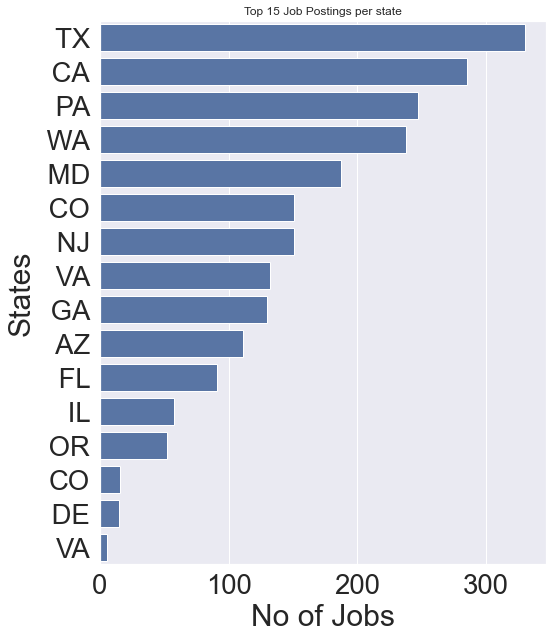

In [600]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))
city_groupby = IndeedJobsData.groupby('state').count().sort_values(by='JobTitle', ascending=False).reset_index()[['state', 'JobTitle']].copy()

sns.barplot(x="JobTitle", y="state", data=city_groupby.loc[0:15,:],
            label="Total", color="b")
ax.set(ylabel="States")
ax.set(xlabel="No of Jobs")
plt.title('Top 15 Job Postings per state', fontsize=12);

In [610]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

# Keytools for datascience jobs 
KeyTools = set(['rust', 'php', 'cntk','google+cloud', 'sql+server','amazon+web+services','lightgbm', 'kubeflow','unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor','bigquery', 'unix', 'react',
 'scikit', 'powerbi', 's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'django', 'sagemaker',
 'seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho', 
 'jquery', 'nodejs', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'hadoop', 'mapreduce', 
 'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable','dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret','rmarkdown',
 'leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
 'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer','python', 'pytorch', 'sql', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout', 
 'cassandra', 'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
 'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'clojure',
 'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle', 
 'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl'])

# Key skills for datascience jobs 
Skills = set(['optimizing', 'prediction', 'forecasting',
 'clustering', 'cluster', 'optimization', 'visualization', 'nlp', 'c#','regression', 'logistic', 'nn', 'cnn', 'glm','rnn', 'lstm', 'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian',
 'bayes','random forest', 'natural language processing', 'machine learning', 'statistics', 'cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly', 'kpi',
 'dashboard', 'geospatial', 'ocr', 'econometrics', 'pca', 'gis', 'svm', 'svd', 'tuning', 'hyperparameter', 'hypothesis',
 'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory',
 'recommender', 'recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics',
 'chi', 'knn', 'outlier', 'etl', 'normalization', 'classification','decision tree', 'deep learning', 'experimental design',
 'time series', 'nearest neighbors', 'neural network', 'support vector machine', 'computer vision', 'machine vision', 'dimensionality reduction', 
 'text analytics', 'power bi', 'a/b testing', 'ab testing', 'chat bot', 'data mining'])

# process the keywords
tool_set = set([ps.stem(x) for x in KeyTools]) 
skill_set = set([ps.stem(x) for x in Skills])
skill_dict = {ps.stem(x):x for x in Skills}
tool_dict = {ps.stem(x):x for x in KeyTools}

In [612]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.util import bigrams


ps = PorterStemmer()



def nlp_processing(desc):
    # word  word_tokenize on description
    token_list1 = [] 
    wordpunkt_tkn = nltk.WordPunctTokenizer()
    tokens = wordpunkt_tkn.tokenize(desc)
    # tokens = nltk.word_tokenize(desc)
    
    #stop words 
    stop = set(stopwords.words('english'))
    for token in tokens:
        if token not in stop:
            token_list1.append(token)
        
    token_tag = nltk.pos_tag(token_list1)
    pos_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens1 = [x for x, tag in token_tag if tag in pos_tags]
    
    # stem words.
    stemmed_tokens = [ps.stem(x).lower() for x in filtered_tokens1]
    return set(stemmed_tokens)

IndeedJobsData['Description_wordtoken'] = IndeedJobsData[IndeedJobsData['Description'].notnull()]['Description'].map(nlp_processing)
#for i in range(6):
#    print(nlp_processing(IndeedJobsData.iloc[i,4]))
IndeedJobsData.isnull().sum()


JobTitle                    0
CompanyName                 0
summary                     0
salary                   2030
Description                 0
city                        0
state                       0
Description_wordtoken       0
dtype: int64

In [613]:
IndeedJobsData.sample(50)

,JobTitle,CompanyName,summary,salary,Description,city,state,Description_wordtoken
713,principal research associate - data science - ...,WESTAT,"you will provide data management, programming,...",NaN,not available,rockville,MD,{avail}
1155,machine learning engineer,Indigo Slate,a machine learning engineer designs and develo...,NaN,a machine learning engineer designs and develo...,bellevue,WA,"{extern, teamcontribut, hiringmanag, api, syst..."
453,data scientist,BAE Systems,you will also develop capabilities that suppor...,NaN,join bae systems' intelligence and security se...,sterling,VA,"{tool, strength, big, securityba, nation, bae,..."
2157,data statistician,Jackson Lewis P.C,ability to multi-task and manage multiple proj...,66000 - 111000 a year,focused on labor and employment law since 1958...,denver,CO,"{think, further, co, polici, affirm, nation, c..."
2197,"ai/ml - software engineer, siri experience",Apple,note: apple benefits programs are subject to e...,NaN,not available,boulder,CO,{avail}
361,senior/principal statistical programmer,CR MEDICON INC,". bachelor degree or above in biostatistics, s...",NaN,. provide on-time delivery with high-quality s...,piscataway,NJ,"{familiar, extern, regul, team, bachelor, vali..."
480,senior data scientist,Luna Innovations,you are a second level data scientist with all...,NaN,job summaryluna labs is looking for a senior d...,charlottesville,VA,"{role, ident, regul, phd, matlab, nation, gend..."
385,"mgr, actuarial iii (predictive modeling)",Horizon Blue Cross Blue Shield of New Jersey,"lead, manage, develop and train staff; oversee...",NaN,job summary:this is a senior level manager pos...,newark,NJ,"{extern, tool, ident, accredit, pluspref, lang..."
470,senior data scientist - nationwide opportunities,"Amazon Web Services, Inc.",experience in an ml engineer or data scientist...,116200 a year,bachelor’s degree in a highly quantitative fie...,herndon,VA,"{role, tool, ident, big, .,, theory6, phd, nat..."
1869,senior data scientist,Sense Corp,"passion for data analytics, modeling, programm...",NaN,design and develop statistical models with big...,dallas,TX,"{industrybenefitssens, countri, varieti, tool,..."


In [615]:
# map the skills and tools with Job description and append the count 
tool_map = []
skill_map = []

num_postings = len(IndeedJobsData['Description'].index)

# range of dataframe length
for i in range(num_postings):
    try:
        desc_data = IndeedJobsData.iloc[i,4].lower()
        desc_token  = IndeedJobsData.iloc[i,7]   
        
        # map of the tools and skills 
        tool_words = tool_set.intersection(desc_token)
        skill_words = skill_set.intersection(desc_token)
        
        i=0
        for words in tool_words:
            if words in desc_data:
                tool_list.append(words)
                i += 1
            
        j = 0
        for skills in skill_words:
            if skills in desc_data:
                skill_map.append(skills)
                j += 1
        if len(tool_words) == 0 and i == 0:
            tool_map.append('nothing specified')
        
        if len(skill_words) == 0 and j == 0:
            skill_map.append('nothing specified')   
        

        tool_map += list(tool_words)
        skill_map += list(skill_words)
    except:
        continue

# Create Dataframe for  top tools used 

Tools_Df = pd.DataFrame(data={'word_count': tool_map})
Tools_Df = Tools_Df.replace(tool_dict)   
Tools_Df = Tools_Df['word_count'].value_counts().reset_index().iloc[:40]

# Create Dataframe for top skills used 
Skills_Df = pd.DataFrame(data={'word_count': skill_map})
Skills_Df = Skills_Df.replace(skill_dict)
Skills_Df = Skills_Df['word_count'].value_counts().reset_index().iloc[:40]

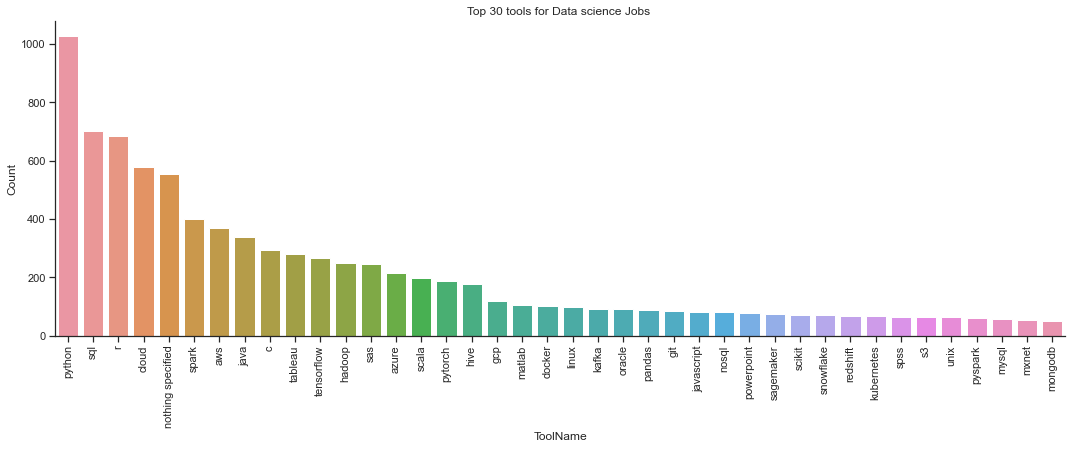

In [623]:
# Plot the top 30 tools used for Datascience jobs 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)
chart = sns.catplot(x="index", y="word_count", kind="bar", data=Tools_Df,height=5, aspect=3);
chart.set(title="Top 30 tools for Data science Jobs ");
chart.set_xticklabels(rotation=90)
chart.set(ylabel="Count",xlabel="ToolName");

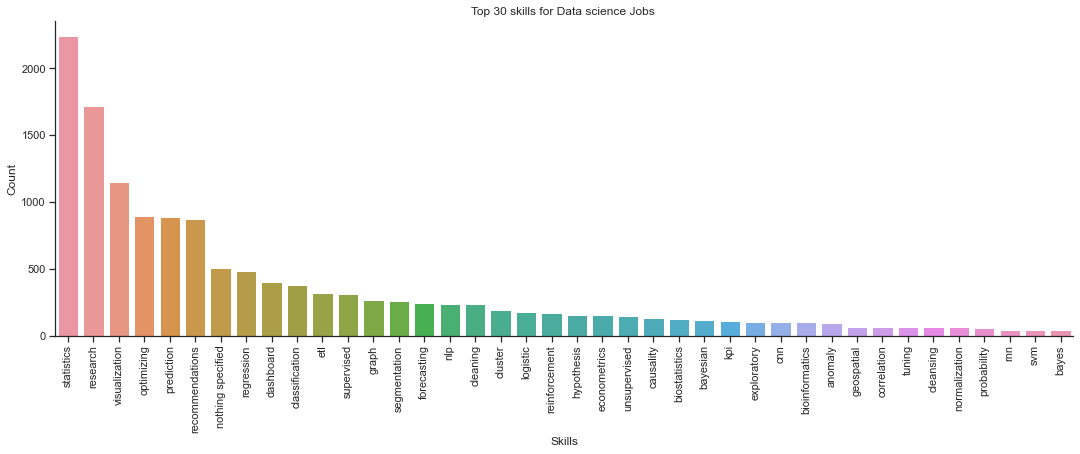

In [624]:
# Plot the top 30 skills used for Datascience jobs 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=False)
chart = sns.catplot(x="index", y="word_count", kind="bar", data=Skills_Df,height=5, aspect=3)
chart.set(title="Top 30 skills for Data science Jobs ")
chart.set_xticklabels(rotation=90)
chart.set(ylabel="Count",xlabel="Skills");

In [627]:
# common words used in all the descriptions of jobs 
import re 

token_list1 = []
token_list2 = []
num_postings = len(IndeedJobsData['Description'].index)

for i in range(num_postings):
    try:
        # WordPunctTokenizer
        desc = IndeedJobsData.iloc[i,4].lower()
        wordpunkt_tkn = nltk.WordPunctTokenizer()
        tokens = wordpunkt_tkn.tokenize(desc)
        stop = set(stopwords.words('english'))
        for token in tokens:
            if token not in stop:
                token_list1.append(token)
        #print(len(token_list1))
    except:
        #print(Indeed_old_data.iloc[i,6])
        continue
    
    #remove special characters 
spl_char = re.compile(r'[-.?!,":;()|0-9]')
for token in token_list1:
    word = spl_char.sub("", token)
    if len(word)>0:
        token_list2.append(word)

# Pos tagging    
tokens_pos_tag = nltk.pos_tag(token_list2)
pos_df = pd.DataFrame(tokens_pos_tag, columns = ('word','POS'))
pos_df.head()
pos_sum = pos_df.groupby('POS', as_index=False).count() # group by POS tags 
pos_sum.sort_values(['word'], ascending=[False]) # in descending order of number of words per tag
filtered_pos = [ ]
for one in tokens_pos_tag:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)

# Using FreqDist of common words used 
fdist_pos = nltk.FreqDist(filtered_pos)
top_100_words = fdist_pos.most_common(80)
top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))
top_words_df.head()
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) # split the tuple of POS
top_words_df = top_words_df.drop('pos', 1) # drop the previous column
top_words_df.sample(20)

,count,Word
11,2715,solutions
63,1122,health
55,1255,statistics
69,1025,performance
7,3442,machine
49,1321,products
27,1948,world
64,1061,part
67,1033,orientation
9,2988,analytics


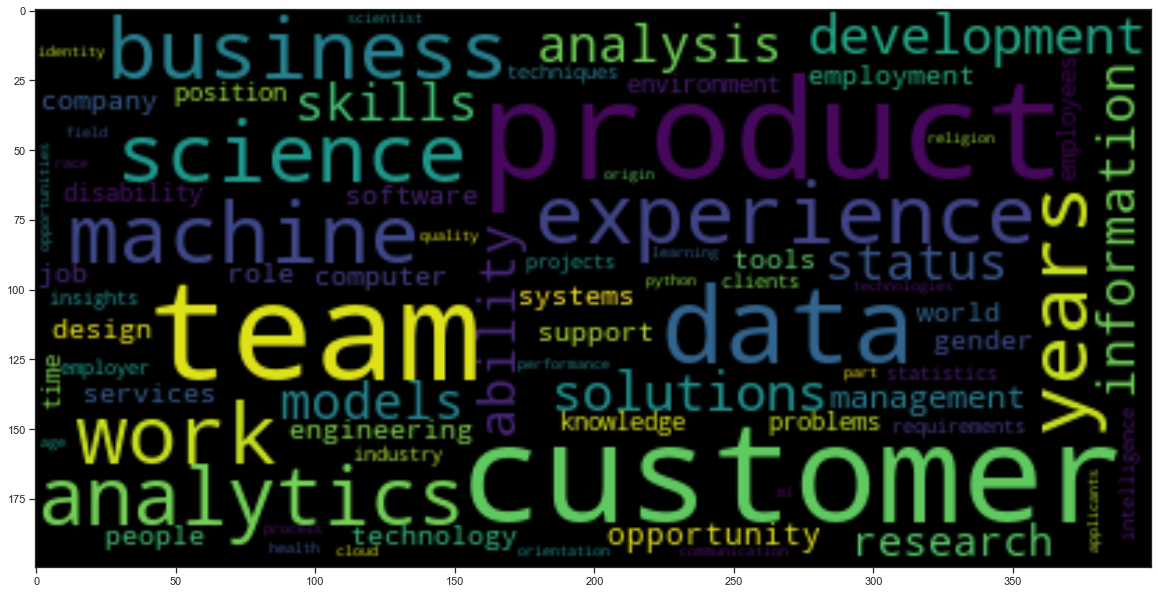

In [628]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50)
wordcloud.generate(' '.join(top_words_df['Word']))
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")

plt.show()

In [629]:
# No of rows containing salary data out of huge dataset 2230 rows  = 179 rows 
IndeedJobsData[IndeedJobsData.salary.notnull()]

,JobTitle,CompanyName,summary,salary,Description,city,state,Description_wordtoken
1,data scientist,Valkyrie Intelligence,we are looking for candidates who are interest...,85000 - 115000 a year,"location: based in austin, txtravel: 0-20%abou...",austin,TX,"{role, tool, %, locat, monday, variou, ’, team..."
2,data scientist,Kronologic,"an ability to use, and extend approaches descr...",90000 - 200000 a year,come help us revolutionize the calendar!core v...,austin,TX,"{role, big, player, literatur, artifici, locat..."
12,data scientist,opentext,5 + years of proven abilities related to data ...,95000 - 125000 a year,opentext - the information companyas the infor...,austin,TX,"{self, nation, 95k, recruit, emphasi, equal, t..."
28,staff machine learning engineer ( python ) - r...,"FireEye, Inc.",incentive compensation: eligibility for annual...,116800 a year,company descriptionfireeye is the intelligence...,austin,TX,"{varieti, tool, ident, 3experi, deliver, natio..."
36,data science lead,OCROLUS,demonstrated skills in predictive modeling and...,100000 - 150000 a year,we are a fintech infrastructure company that i...,austin,TX,"{sale, visibl, recruit, locat, econom, 100, te..."
...,...,...,...,...,...,...,...,...
2190,sr. data & ml engineer,"Amazon Web Services, Inc.",hands on experience working on large-scale dat...,122300 a year,not available,denver,CO,{avail}
2191,machine learning pipeline engineer,Pearson,familiarity with data warehouse and data lake ...,110000 - 120000 a year,not available,boulder,CO,{avail}
2193,"senior scientist, observing systems & data ass...",Vaisala,provide consultation for demanding engineering...,90000 - 110000 a year,not available,boulder,CO,{avail}
2198,sr. data & ml engineer,"Amazon Web Services, Inc.",hands on experience working on large-scale dat...,122300 a year,"bachelor’s degree in computer science, enginee...",boulder,CO,"{familiar, role, varieti, tool, ident, drive, ..."


In [644]:
# Get the salaryData with not null values 
SalaryDataJobs = IndeedJobsData[IndeedJobsData.salary.notnull()].copy()
SalaryDataJobs.drop(['Description_wordtoken'], axis=1, inplace=True)
SalaryDataJobs.drop_duplicates(inplace=True)
SalaryDataJobs.reset_index(drop=True, inplace=True)

In [645]:
# clean data 
SalaryDataJobs.isnull().sum()

JobTitle       0
CompanyName    0
summary        0
salary         0
Description    0
city           0
state          0
dtype: int64

In [646]:
# Save the dataframe for salary 
SalaryDataJobs.to_pickle("clean_salaryData_indeed.pkl")

In [647]:
SalaryDataJobs.sample(50)

,JobTitle,CompanyName,summary,salary,Description,city,state
31,data scientist - nationwide opportunities,"Amazon Web Services, Inc.",experience in an ml engineer or data scientist...,114700 a year,bachelor’s degree in a highly quantitative fie...,arlington,VA
142,software engineer - machine learning,Liberty Mutual Insurance,runway makes it as fast and easy for data scie...,67900 - 121700 a year,not available,plano,TX
149,sports statistician (part-time),SportsDataIO,our sports data api solutions scale across all...,13 - 15 an hour,sports statistician (part-time)descriptionspor...,scottsdale,AZ
70,data scientist,Red Dot Storage,access and manage proprietary data sets and vi...,100000 - 120000 a year,red dot storage is looking for a skilled profe...,louisville,CO
86,senior data science and projection modeling lead,BDS Analytics,interface with data end-users and the data sto...,120000 - 140000 a year,job summary: the analytics team empowers bdsa ...,colorado,CO
108,machine learning engineer,FalconsUs,you will be responsible for building a scalabl...,132399 - 248586 a year,"if you post this job on a job board, please do...",seattle,WA
145,data analyst sr,PNC Financial Services Group,"as a subject matter expert (sme), you’ll span ...",55000 - 142600 a year,not available,pittsburgh,PA
79,senior data science manager - job seeker profile,Indeed,our data scientists build and implement machin...,187000 - 231000 a year,not available,denver,CO
157,sr. data scientist,VF Corporation,5+ years of experience in retail analytics/mar...,144000 - 216000 a year,sr. data scientist : become the newest member ...,denver,CO
90,senior data science engineer,DISH,the data science engineer is responsible for b...,99360 a year,"at dish wireless, we reimagine connectivity th...",littleton,CO


In [648]:
SalaryDataJobs.dtypes

JobTitle       object
CompanyName    object
summary        object
salary         object
Description    object
city           object
state          object
dtype: object

In [650]:
#Based up on the data based on tail and head , we will do  Data cleanup for salary range per year/month/day/hour

import numpy as np


# Find the salary type based on the salary content 
SalaryDataJobs.loc[SalaryDataJobs['salary'].str.contains('year'), 'salary_type'] = 'year'
SalaryDataJobs.loc[SalaryDataJobs['salary'].str.contains('month'), 'salary_type'] = 'month'
SalaryDataJobs.loc[SalaryDataJobs['salary'].str.contains('week'), 'salary_type'] = 'week'
SalaryDataJobs.loc[SalaryDataJobs['salary'].str.contains('day'), 'salary_type'] = 'day'
SalaryDataJobs.loc[SalaryDataJobs['salary'].str.contains('hour'), 'salary_type'] = 'hour'

#Salary_df
SalaryDataJobs.salary.replace(r'[a-zA-Z%]', '', regex=True, inplace=True)
SalaryDataJobs['salary_range'] = SalaryDataJobs['salary'].str.split('-')
SalaryDataJobs

#Mean salary range for a specific range 
# converting the datatype to float 
def mean(df ):
    SalaryDataJobs['lower_cut'] = SalaryDataJobs['salary_range'].str[0].astype('float') # converting the datatype to float 
    SalaryDataJobs['upper_cut'] = SalaryDataJobs['salary_range'].str[1].astype('float') # converting the datatype to float 
    SalaryDataJobs['salary_mean'] = SalaryDataJobs[['lower_cut','upper_cut']].mean(axis=1)
    
    
mean(SalaryDataJobs)

SalaryDataJobs.drop(['salary_range', 'lower_cut', 'upper_cut'], axis=1, inplace=True)

In [651]:
SalaryDataJobs.dtypes

JobTitle        object
CompanyName     object
summary         object
salary          object
Description     object
city            object
state           object
salary_type     object
salary_mean    float64
dtype: object

In [652]:
# mean sample across 179 rows , column:salary_mean
SalaryDataJobs.sample(50)

,JobTitle,CompanyName,summary,salary,Description,city,state,salary_type,salary_mean
112,data science resident,Galvanize,"as part of the residency program, you will rec...",35,**this position is reserved for former student...,los angeles,CA,hour,35.0
73,staff data scientist - ai ethics,Indeed,"have full stack experience in data collection,...",157000 - 191000,not available,denver,CO,year,174000.0
123,machine learning engineer,"Data-Core System, Inc.",python coding based machine (deep) learning sk...,50000,ailabs is a startup founded by data-core syste...,philadelphia,PA,year,50000.0
55,chief data scientist,SAIC,will use agile techniques to help define our m...,125001 - 150000,"job id: 216960location: colorado springs , co ...",colorado springs,CO,year,137500.5
89,senior machine learning engineer,Ibotta,6+ years of experience as machine learning eng...,115000 - 140000,ibotta is looking for a senior machine learnin...,denver,CO,year,127500.0
42,watson health -ai development lead,IBM,works with client-facing team and health insur...,105000 - 162000,"introductionas an ibm application architect, y...",baltimore,MD,year,133500.0
85,machine learning engineer: audiences & attribu...,Oracle,"in the machine learning engineer role, you'll ...",99333 - 178795,we are looking for a machine learning engineer...,broomfield,CO,year,139064.0
133,data scientist (c++ machine learning) should h...,MaxisIT Inc,they must have strong experience using a varie...,80 - 90,not available,duluth,GA,hour,85.0
114,senior data scientist,The Studio Technologies,data scientist: 3 years (preferred).experience...,5000,senior data analyst / scientistjob description...,long beach,CA,month,5000.0
87,engineer senior - machine learning/ deep learn...,Ball Aerospace,"we create innovative space solutions, enable m...",126500 - 159500,powered by endlessly curious people with an un...,westminster,CO,year,143000.0


In [653]:
# calculate salary per year for hour/day/month/week accoridngly 
for index in range(0,SalaryDataJobs.shape[0],1):
    data = SalaryDataJobs.iloc[index,7]
    #print(type(Salary_df['salary_mean']))
    if data == 'month':
        SalaryDataJobs.at[index,'salary_mean'] = SalaryDataJobs.iloc[index,8].astype(float) * 12 
    elif data == 'week':
        SalaryDataJobs.at[index,'salary_mean'] = SalaryDataJobs.iloc[index,8].astype(float) * 52 
    elif data == 'day':
        SalaryDataJobs.at[index,'salary_mean'] = SalaryDataJobs.iloc[index,8].astype(float) * 260
    elif data == 'hour':
        SalaryDataJobs.at[index,'salary_mean'] = SalaryDataJobs.iloc[index,8].astype(float) * 2080

        
SalaryDataJobs.drop(['salary_type'], axis=1, inplace=True)

In [654]:
SalaryDataJobs.sample(10)

,JobTitle,CompanyName,summary,salary,Description,city,state,salary_mean
123,machine learning engineer,"Data-Core System, Inc.",python coding based machine (deep) learning sk...,50000,ailabs is a startup founded by data-core syste...,philadelphia,PA,50000.0
101,computer vision machine learning engineer,Allness Inc,*be part of a cross-functional team of life sc...,160000 - 165000,not available,south san francisco,CA,162500.0
165,senior data scientist,Uplight,develop cutting-edge machine learning models t...,105000 - 120000,the positiondo you dream about creating a more...,denver,CO,112500.0
89,senior machine learning engineer,Ibotta,6+ years of experience as machine learning eng...,115000 - 140000,ibotta is looking for a senior machine learnin...,denver,CO,127500.0
164,data scientist 3,Oracle,experience creating data visualizations to hig...,99333 - 178795,bs/ms in mathematics/statistics/cs/data scienc...,broomfield,CO,139064.0
105,principal data scientist,Attunely,experience with creating machine learning mode...,180000,principal data scientistattunely is looking fo...,seattle,WA,180000.0
147,data scientist,"Iridium Satellite, LLC",assist with mining data from primary and secon...,68000,the data scientist ii will be responsible for ...,chandler,AZ,68000.0
177,sr. data & ml engineer,"Amazon Web Services, Inc.",hands on experience working on large-scale dat...,122300,"bachelor’s degree in computer science, enginee...",boulder,CO,122300.0
104,data scientist,Aguilass llc,data science: 3 years (preferred).data modelin...,115648 - 120000,"skills: data science, data modelling, analytic...",bellevue,WA,117824.0
109,principal machine learning scientist (nlp/conv...,Techire AI,the benefits package is exceptional and includ...,150000 - 185000,some people call conversation a dying art.but ...,bothell,WA,167500.0


In [655]:
print("salary median: " + str(SalaryDataJobs["salary_mean"].median()))
print("salary mean: " + str(SalaryDataJobs["salary_mean"].mean()))

salary median: 115000.0
salary mean: 114162.34469273743


Text(0.5, 1.0, 'Salary Mean across Indeed Jobs Data')

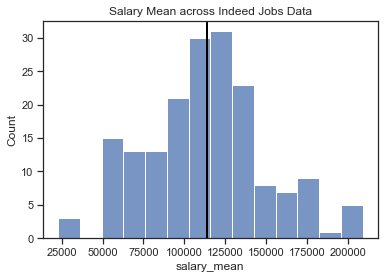

In [656]:
# Plot the mean salary of the indeed jobs salary data 
chart = sns.histplot(SalaryDataJobs["salary_mean"])
chart.axvline(SalaryDataJobs["salary_mean"].mean(), lw=2, color='black')
chart.set_title('Salary Mean across Indeed Jobs Data')

In [657]:
# create new col "salary_above_median" for a categorical variable based on median salary
SalaryDataJobs["salary_above_median"] = np.nan
SalaryDataJobs.loc[SalaryDataJobs["salary_mean"] > SalaryDataJobs["salary_mean"].median(), "salary_above_median"] = 1
SalaryDataJobs.loc[SalaryDataJobs["salary_mean"] <= SalaryDataJobs["salary_mean"].median(), "salary_above_median"] = 0
SalaryDataJobs.sample(40)

,JobTitle,CompanyName,summary,salary,Description,city,state,salary_mean,salary_above_median
32,senior data scientist,SAIC,the successful candidate will have strong expe...,115001 - 125000,"job id: 217662location: reston , va , usdate p...",reston,VA,120000.5,1.0
45,senior statistician,"TAYS, Inc",ability to manage multiple projects efficientl...,50 - 80,tays inc. is seeking a senior statistician for...,woodlawn,MD,135200.0,1.0
143,senior data analyst,The University of Pittsburgh,the incumbent will work with multi-disciplinar...,46644 - 76440,senior data analystgsph-health policy & manage...,pittsburgh,PA,61542.0,0.0
130,watson health -ai development lead,IBM,works with client-facing team and health insur...,105000 - 162000,"introductionas an ibm application architect, y...",atlanta,GA,133500.0,1.0
52,lead senior data scientist,The Trade Desk,our data scientists have deep knowledge and ex...,153900 - 241500,the trade desk is a global technology company ...,boulder,CO,197700.0,1.0
77,analytic data scientist (ts/sci),IBM,duties include: • developing and maintaining a...,107000 - 194000,"introductionas a data scientist at ibm, you wi...",denver,CO,150500.0,1.0
62,"senior decision scientist, cpg",Ibotta,5+ years of practical work experience in analy...,90000 - 120000,"ibotta is seeking a senior decision scientist,...",denver,CO,105000.0,0.0
68,machine learning engineer and architect,Micro Focus,supervise available datasets online or in-hous...,173114,job description:machine learning engineer and ...,fort collins,CO,173114.0,1.0
39,data science analyst,DLH,familiarity with matlab (data analytics softwa...,112000,iba is currently recruiting for a data science...,frederick,MD,112000.0,0.0
6,data pipeline engineering scientist r_12650,Applied Research Laboratories,the retirement plan for this position is teach...,88000 - 130000,please note: you must submit an application th...,austin,TX,109000.0,0.0


In [658]:
# Divide the Salary DataFrame into two parts 
Salary_IndeedJobs = SalaryDataJobs.iloc[:,0:len(SalaryDataJobs.columns)-1].copy()
# median categorical variable
Salary_category_median = pd.DataFrame(SalaryDataJobs["salary_above_median"])

In [659]:
from sklearn.model_selection import train_test_split
# Split the data into 30 & 70 % using sklearn library 
TrainData_1, Traintest_1, TrainData_2, Traintest_2 = train_test_split(Salary_IndeedJobs, Salary_category_median,test_size=0.3, stratify=Salary_category_median, random_state=40)

# Reset the index for ease 
TrainData_1.reset_index(drop=True, inplace=True)
Traintest_1.reset_index(drop=True, inplace=True)
TrainData_2.reset_index(drop=True, inplace=True)
Traintest_2.reset_index(drop=True, inplace=True)

In [660]:
# will use logistic regression concepts to examine text data via CountVectorizer  
from sklearn.feature_extraction.text import CountVectorizer
def CountVectorProcess(dataframe_column):
    # using ngram from 1-3 and min_df 5% , analyzer =word 
    countVector = CountVectorizer(stop_words='english',analyzer='word' ,ngram_range=(1, 3), min_df = .05, max_features=10)
    #Checking the column JobTitle 
    countVector.fit(dataframe_column)
    JobTitle_TrainData = pd.DataFrame(countVector.transform(dataframe_column).todense(),columns=countVector.get_feature_names())
    # concat jobtitle train data into TrainData_2 dataframe
    word_train = pd.concat([JobTitle_TrainData, TrainData_2], axis=1)
    #creating a "ratio" column to determine frequency of words associated with above median jobs vs. below median jobs
    wordCount_belowmedian = word_train[word_train["salary_above_median"]==0].sum(axis=0)
    wordCount_abovemedian = word_train[word_train["salary_above_median"]==1].sum(axis=0)
    # Transpose the Dataframe
    Ratio_variable = pd.DataFrame([wordCount_belowmedian, wordCount_abovemedian]).T
    Ratio_variable["ratio"] = Ratio_variable[1]/Ratio_variable[0]
    Final_ratio = Ratio_variable.ratio.sort_values(ascending=False)
    #print(Final_ratio)
    # word_train.tail(10)
    return Final_ratio

In [661]:
# City words effecting for above median salary 
City_Data_4_above_median = CountVectorProcess(TrainData_1['city'])
print(City_Data_4_above_median)


salary_above_median         inf
austin                 0.833333
boulder                0.800000
denver                 0.769231
Name: ratio, dtype: float64


In [662]:
# JobTitle words effecting for above median salary 
Title_Data_4_above_median = CountVectorProcess(TrainData_1['JobTitle'])
print(Title_Data_4_above_median)


salary_above_median           inf
senior data scientist    3.666667
senior data              2.500000
engineer                 1.625000
learning                 1.625000
machine learning         1.500000
machine                  1.444444
senior                   1.312500
scientist                1.076923
data scientist           1.043478
data                     0.951220
Name: ratio, dtype: float64


In [663]:
# summary words effecting for above median salary 
summary_Data_4_above_median = CountVectorProcess(TrainData_1['summary'])
print(summary_Data_4_above_median)

salary_above_median         inf
science                3.250000
machine learning       1.545455
learning               1.235294
analytics              1.200000
models                 1.181818
machine                1.133333
ml                     1.125000
experience             1.120000
data                   0.985915
years                  0.636364
Name: ratio, dtype: float64


In [664]:
# Description words effecting for above median salary 
Desc_Data_4_above_median = CountVectorProcess(TrainData_1['Description'])
print(Desc_Data_4_above_median)

salary_above_median         inf
years                  1.556701
learning               1.413462
team                   1.393617
experience             1.304688
science                1.294118
data                   1.250518
work                   0.939394
business               0.915493
analysis               0.906542
position               0.887850
Name: ratio, dtype: float64


In [665]:
state_Data_4_above_median = CountVectorProcess(TrainData_1['state'])
print(state_Data_4_above_median)

salary_above_median         inf
nj                     2.500000
tx                     1.666667
va                     1.000000
pa                     0.600000
az                     0.333333
md                     0.285714
Name: ratio, dtype: float64


In [676]:
# Using the 5 variables "JobTitle", "City" , 'state', "Summary", "Description"  we will build a model to predict if the 
# job lands in salary_above_median or salary_below_median
# summary words effecting for above median salary 

salary_variables = SalaryDataJobs[["JobTitle", "summary", "Description","city", "state"]].copy()
salary_median = SalaryDataJobs[["salary_above_median"]].copy()
#salary_median= salary_median.values()
salary_median = salary_median.values.ravel()


# 1st binary variable
salary_variables["is_good_city"] = 0
#SalaryDataJobs.loc[SalaryDataJobs['salary'].str.contains('hour'), 'salary_type'] = 'hour'
salary_variables.loc[(salary_variables["city"].str.contains("austin")|
                      salary_variables["city"].str.contains("denver")) , "is_good_city"] = 1

#salary_variables['is_good_city'].sample(10)

# 2nd binary variable 

salary_variables["is_good_title"] = 0
#SalaryDataJobs.loc[SalaryDataJobs['salary'].str.contains('hour'), 'salary_type'] = 'hour'
salary_variables.loc[(salary_variables["JobTitle"].str.contains("senior data scientist")|
                      salary_variables["JobTitle"].str.contains("senior data")) , "is_good_title"] = 1

# salary_variables['is_good_title'].sample(10)


salary_variables["is_good_summary"] = 0
#SalaryDataJobs.loc[SalaryDataJobs['salary'].str.contains('hour'), 'salary_type'] = 'hour'
salary_variables.loc[(salary_variables["summary"].str.contains("science")|
                      salary_variables["summary"].str.contains("machine learning")) , "is_good_summary"] = 1

#salary_variables['is_good_summary'].sample(10)

salary_variables["is_good_Description"] = 0
#SalaryDataJobs.loc[SalaryDataJobs['salary'].str.contains('hour'), 'salary_type'] = 'hour'
salary_variables.loc[(salary_variables["Description"].str.contains("years")|
                      salary_variables["Description"].str.contains("learning")) , "is_good_Description"] = 1

#salary_variables['is_good_Description'].sample(10)

salary_variables["is_good_state"] = 0
#SalaryDataJobs.loc[SalaryDataJobs['salary'].str.contains('hour'), 'salary_type'] = 'hour'
salary_variables.loc[(salary_variables["state"].str.contains("NJ")|
                      salary_variables["state"].str.contains("TX")) , "is_good_state"] = 1

#salary_variables['is_good_state'].sample(10)

salary_variables.drop(["JobTitle", "summary", "Description","city", "state"], axis=1, inplace=True)


In [677]:
salary_variables

,is_good_city,is_good_title,is_good_summary,is_good_Description,is_good_state
0,1,0,0,1,1
1,1,0,0,1,1
2,1,0,0,1,1
3,1,0,0,1,1
4,1,0,1,1,1
...,...,...,...,...,...
174,1,0,1,0,0
175,0,0,0,0,0
176,0,0,0,0,0
177,0,0,1,1,0


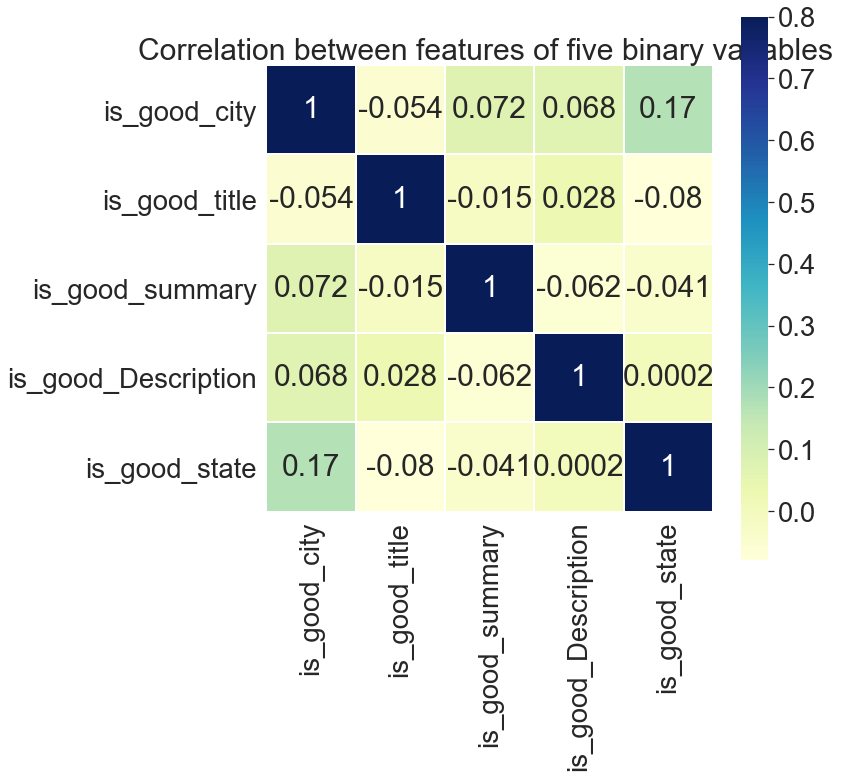

In [678]:
#Creating heatmap correlation of 5 binary variables

plt.figure(figsize=(10, 10))
sns.heatmap(salary_variables.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features of five binary variables ');

# City and state are 0.17 correlated based on the below heatmap


In [679]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(salary_variables, salary_median
                                    , test_size=0.2, stratify=salary_median, random_state=74)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print(f"Accuracy score :{logreg.score(x_train, y_train)}")
scores = cross_val_score(logreg, x_train, y_train, cv=6)
print(f"crossvalidated scores:{ scores}")

#Based on the Accuracy score we got 63 %

Accuracy score :0.6363636363636364
crossvalidated scores:[0.58333333 0.54166667 0.5        0.70833333 0.70833333 0.65217391]


In [680]:
y_probs = logreg.predict(x_test)   
#generates predicted values of Y_test from X_test based off of training set.
print(f"Score:{logreg.score(x_test, y_test)}")
#Create classification and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_probs,))
#printing classification report
target_names = ['salary_below_median', 'salary_above_median']
print(classification_report(y_test, y_probs, target_names=target_names))

# Score on test data is about 61% which is fare 

Score:0.6111111111111112
[[15  4]
 [10  7]]
                     precision    recall  f1-score   support

salary_below_median       0.60      0.79      0.68        19
salary_above_median       0.64      0.41      0.50        17

           accuracy                           0.61        36
          macro avg       0.62      0.60      0.59        36
       weighted avg       0.62      0.61      0.60        36



In [681]:
# Predict the salary for the fields with null value based upon the above model of 5 binary variables used
Predict_salary = IndeedJobsData[IndeedJobsData.salary.isnull()]
Predict_salary.count()

JobTitle                 2030
CompanyName              2030
summary                  2030
salary                      0
Description              2030
city                     2030
state                    2030
Description_wordtoken    2030
dtype: int64

In [682]:
Predict_salary = Predict_salary[["JobTitle", "summary", "Description","city", "state"]].copy()
# Predict_median = IndeedJobsData[["salary_above_median"]].copy()
# Predict_median = Predict_median.values.ravel()

# 1st binary variable
Predict_salary["is_good_city"] = 0
Predict_salary.loc[(Predict_salary["city"].str.contains("austin")|
                      Predict_salary["city"].str.contains("denver")) , "is_good_city"] = 1

#Predict_salary['is_good_city'].sample(10)

# 2nd binary variable 

Predict_salary["is_good_title"] = 0
Predict_salary.loc[(Predict_salary["JobTitle"].str.contains("senior data scientist")|
                      Predict_salary["JobTitle"].str.contains("senior data")) , "is_good_title"] = 1

# Predict_salary['is_good_title'].sample(10)


Predict_salary["is_good_summary"] = 0
Predict_salary.loc[(Predict_salary["summary"].str.contains("science")|
                      Predict_salary["summary"].str.contains("machine learning")) , "is_good_summary"] = 1

#salary_variables['is_good_summary'].sample(10)

Predict_salary["is_good_Description"] = 0
Predict_salary.loc[(Predict_salary["Description"].str.contains("years")|
                      Predict_salary["Description"].str.contains("learning")) , "is_good_Description"] = 1

#Predict_salary['is_good_Description'].sample(10)

Predict_salary["is_good_state"] = 0

Predict_salary.loc[(Predict_salary["state"].str.contains("NJ")|
                      Predict_salary["state"].str.contains("TX")) , "is_good_state"] = 1

#Predict_salary['is_good_state'].sample(10)

Predict_salary.drop(["JobTitle", "summary", "Description","city", "state"], axis=1, inplace=True)

In [468]:
Predict_salary

,is_good_city,is_good_title,is_good_summary,is_good_Description,is_good_state
0,1,0,0,1,1
3,1,0,1,1,1
4,1,0,0,1,1
5,1,0,0,1,1
6,1,0,0,1,1
...,...,...,...,...,...
2204,0,0,1,0,1
2205,0,0,0,0,1
2206,0,0,1,0,1
2207,0,0,1,0,1


In [683]:
#generating median salary predictions for unsalaried job postings
salary_prediction = IndeedJobsData[IndeedJobsData.salary.isnull()].copy()
predict_y = logreg.predict(Predict_salary)   
salary_prediction["salary_median_prediction"] = predict_y
salary_prediction.sample(50)

,JobTitle,CompanyName,summary,salary,Description,city,state,Description_wordtoken,salary_median_prediction
1045,data scientist iii,Expedia.com,experience with data visualization tools and p...,NaN,data scientist iiiare you passionate about usi...,seattle,WA,"{verifi, tool, rich, ident, version, .,, phd, ...",1.0
5,data scientist,Hard Rock Digital,"as a data scientist, you will be a technical l...",NaN,what are we building?hard rock digital is a te...,austin,TX,"{role, varieti, authent, drive, move, join, ra...",1.0
264,"associate director, data science",Bristol Myers Squibb,creates robust models based on statistical and...,NaN,"at bristol myers squibb, we are inspired by a ...",princeton,NJ,"{role, varieti, bm, told, manner, seriou, recr...",0.0
694,senior statistician late cvrm,AstraZeneca,"in this role, we will give you the chance to u...",NaN,those who join astrazeneca not only feel a sen...,gaithersburg,MD,"{gaithersburg, role, extern, rich, strength, m...",0.0
947,"data scientist, protein engineering",Molecular Templates Inc,"maintain knowledge of scientific trends, indus...",NaN,company description:molecular templates is a c...,austin,TX,"{programs, extern, ident, rich, host, throughp...",1.0
1778,senior product manager - machine learning (xpa...,Palo Alto Networks,actively seek out and find new data-centric in...,NaN,not available,atlanta,GA,{avail},0.0
1467,senior associate data science & analytics,Razorfish,this role will work across multiple data and a...,NaN,company descriptionhi there! we’re razorfish. ...,el segundo,CA,"{role, tool, strength, ident, nation, matlab, ...",0.0
1405,lead data scientist – search and personalization,Getty Images,using your deep machine learning expertise whi...,NaN,"who we are:for 25 years, getty images has embr...",los angeles,CA,"{hive, extern, tumblr, exampleon, gender, equa...",1.0
1858,"senior frontend engineer - ai startup, 100% re...",Excellent Professionals and Management Staffing,build the ui for complex systems at the forefr...,NaN,"senior frontend engineer - ai startup, 100% re...",fort worth,TX,"{role, tool, technologiescollabor, overal, phd...",0.0
1759,senior data analyst mdm,"Serta Simmons Bedding, LLC",coordinate master data requirements with other...,NaN,serta simmons bedding is one of north america'...,doraville,GA,"{authent, role, tool, drive, overal, polici, w...",1.0


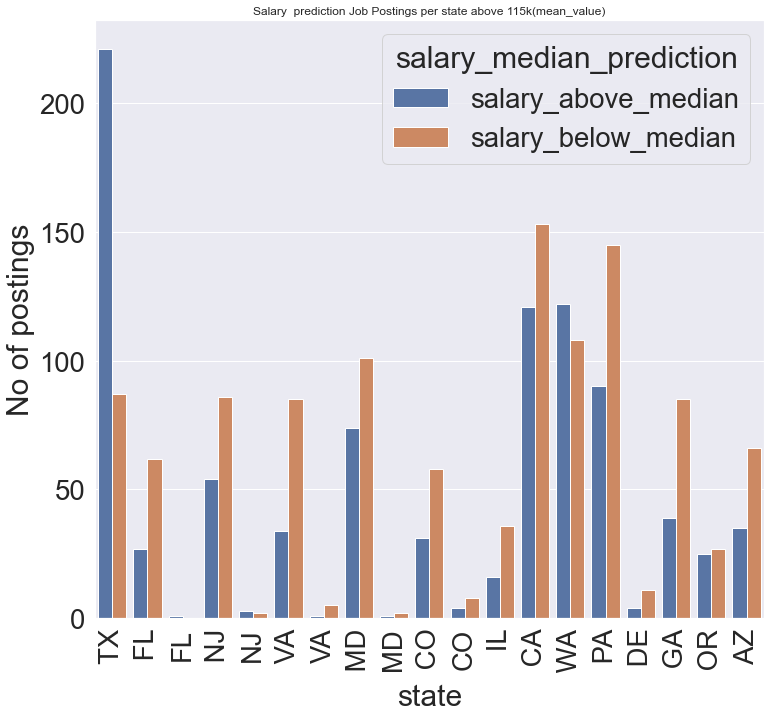

In [684]:

f, ax = plt.subplots(figsize=(12, 11))
plt.title('Salary  prediction Job Postings per state above 115k(mean_value)', fontsize=12);
predictions_state = pd.DataFrame(salary_prediction[["state", "salary_median_prediction"]])
predictions_state['salary_median_prediction'] = predictions_state.salary_median_prediction.map(
    {0:"salary_below_median", 1:"salary_above_median"})
sns.countplot(x="state", hue="salary_median_prediction", data=predictions_state)
sns.set(font_scale=2.5)
plt.xticks(rotation=90)
plt.ylabel("No of postings")
plt.show()


# Based on the below graph we see the salary above median is high in TX state  and this due to less no of 
# states invovled in CA 